In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

# Distribution Plots

In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


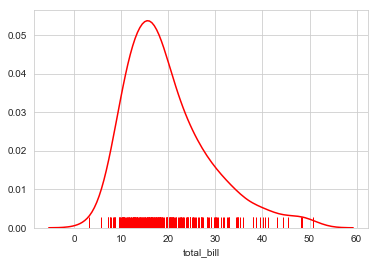

In [38]:
# One Variable
sns.set_style('whitegrid')
sns.distplot(tips['total_bill'] ,rug=True,hist=False ,kde=True, color='r')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


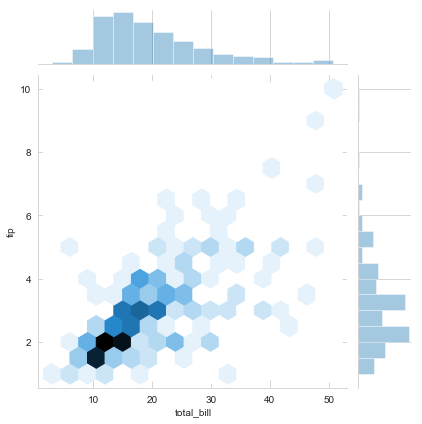

In [18]:
# 2 Variable
# kind = scatter | hex | reg
sns.jointplot(data=tips , x = 'total_bill' , y='tip',kind='hex')

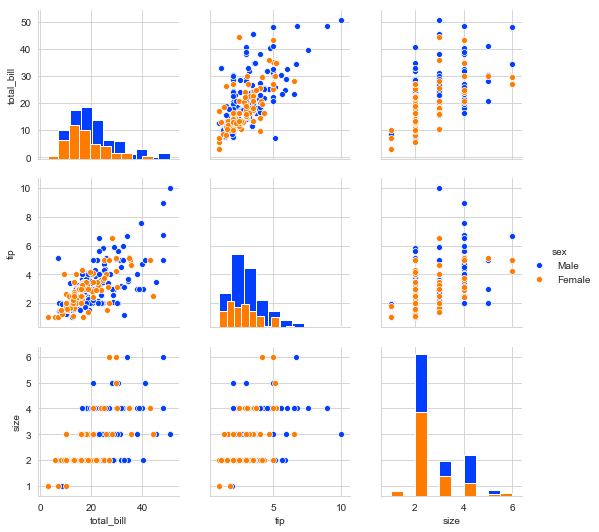

In [34]:
sns.pairplot(tips,hue='sex',diag_kind='hist' , palette='bright')

In [21]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


# Categorical Plots

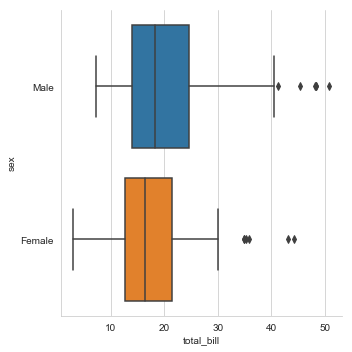

In [44]:
# Dua Variabel
sns.catplot(data=tips , x='total_bill' , y = 'sex' , kind='box')

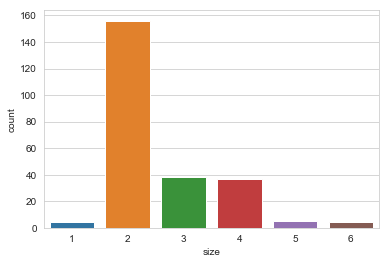

In [53]:
# One Variable
sns.countplot(tips['size'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


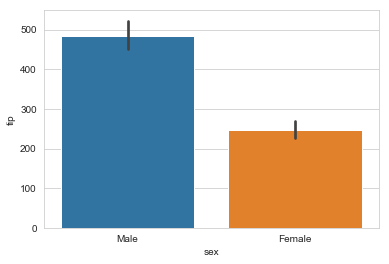

In [59]:
# Two Variable
sns.barplot(x='sex',y='tip',data=tips,estimator=np.sum)

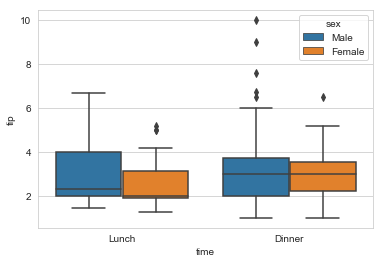

In [64]:
sns.boxplot(x='time',y='tip',data=tips,hue='sex')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


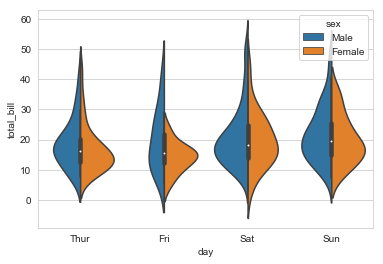

In [67]:

sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

# Matrix Plots

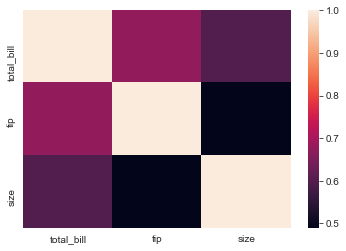

In [71]:
# 2D Data

sns.heatmap(tips.corr())

In [72]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [75]:
tip_pivot_1 = tips.pivot_table(columns='day',index='smoker',values='tip',aggfunc=np.count_nonzero)

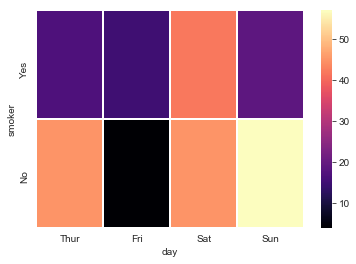

In [77]:
sns.heatmap(tip_pivot_1,linecolor='white',linewidths=1,cmap='magma')

In [78]:
flight = sns.load_dataset('flights')

In [79]:
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [80]:
flight.nunique()

year           12
month          12
passengers    118
dtype: int64

In [88]:
flig_pivot = flight.pivot_table(columns='year',index='month',values='passengers')

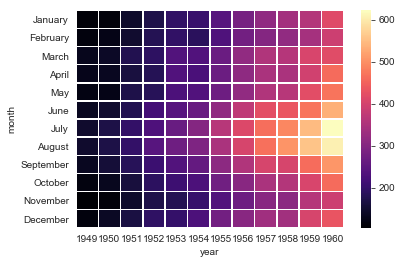

In [94]:
sns.heatmap(flig_pivot,linecolor='white' , linewidths=0.5,cmap='magma')

In [95]:
# ClusterMap

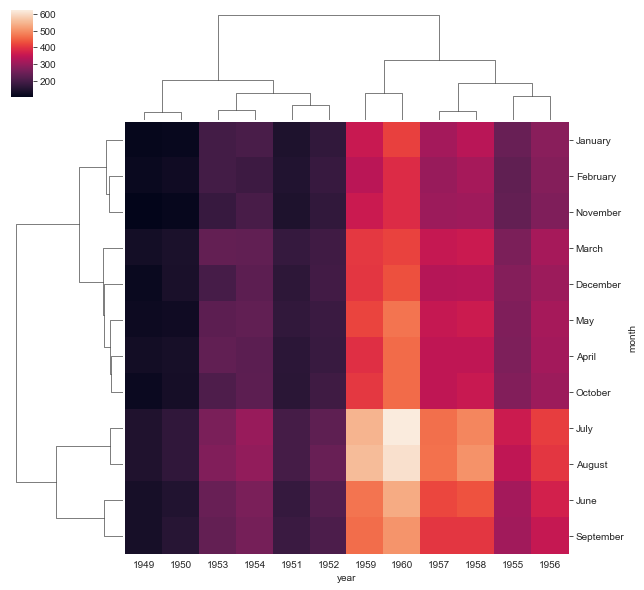

In [96]:
sns.clustermap(flig_pivot)

# Comparing Value

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


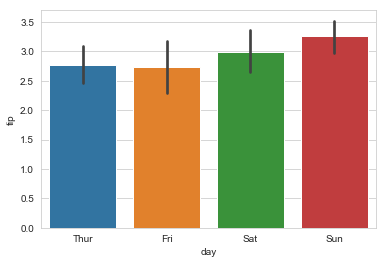

In [97]:
sns.barplot(x='day',y='tip',data=tips)

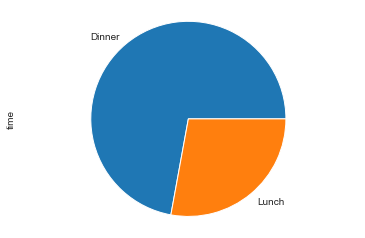

In [106]:
tips['time'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

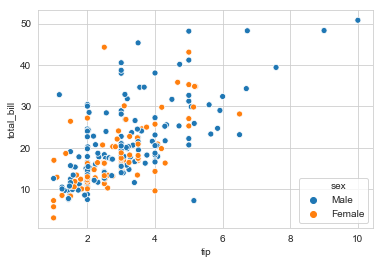

In [108]:
sns.scatterplot(x='tip',y='total_bill',data=tips,hue='sex')

In [111]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sex','day' , tips)

,Sun,Sat,Thur,Fri
sex,,,,
Female,18,28,32,9
Male,58,59,30,10


In [115]:
piv_tips_stack= tips.pivot_table(columns='day' , index='sex',values='tip' , aggfunc=np.count_nonzero)

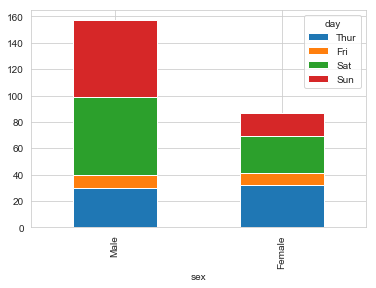

In [116]:
piv_tips_stack.plot(kind='bar',stacked=True)